# Лабораторная работа 4

## Клепиков Никита

Dataset: Students Performance in Exams

Ссылка на датасет: https://www.kaggle.com/spscientist/students-performance-in-exams

Группа: 6132 - 010402D

Для начала необходимо подключить необходимые для выполнения лабораторной работы библиотеки

In [1]:
import pandas as pd
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
from sklearn.metrics import plot_roc_curve
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import seaborn as sns

1. Выберите набор данных для классификации (бинарной или многоклассовой — не важно). Опишите данные, что обозначает каждый столбец, какого типа (категориальный, вещественный, целочисленный, бинарный) данный столбец, при необходимости для категориальных в том числе бинарных признаков привести расшифровку их значений. В общем, проведите "визуальный" анализ ваших данных.

In [2]:
students = pd.read_csv('Students.csv')

* gender - пол (бинарный)
        male - мужской
        female - женский
* race/ethnicity - раса/этническая принадлежность (категориальный)
        group A
        group B
        group C
        group D
        group E

* parental level of education - уровень образования родителей (категориальный)
        bachelor's degree - степень бакалавра
        some college - несколько колледжей
        master's degree - степень магистра
        associate's degree - степень младшего специалиста
        high school - средняя школа
        some high school - несколько средних школ
* lunch - обед (бинарный)
        standard - стандартный
        free/reduced - бесплатный/льготный
* test preparation course - курс подготовки к экзаменам (бинарный)
        completed - пройден
        none - не пройден
* math score - баллы по математике (числовой)

* reading score - баллы по чтению (числовой)

* writing score - баллы по письменному экзамену (числовой)

* sum - сумма баллов (числовой)

* status - статус (бинарный)
        clever - умный
        beautiful - красивый
* gpa - средний балл (числовой)

1.0. Для вашего датасета преобразовать категориальные признаки в бинарные с помощью pd.factorize / pd.get_dummies

In [3]:
students_new = pd.get_dummies(students)
students_new

,math score,reading score,writing score,gender_female,gender_male,race/ethnicity_group A,race/ethnicity_group B,race/ethnicity_group C,race/ethnicity_group D,race/ethnicity_group E,parental level of education_associate's degree,parental level of education_bachelor's degree,parental level of education_high school,parental level of education_master's degree,parental level of education_some college,parental level of education_some high school,lunch_free/reduced,lunch_standard,test preparation course_completed,test preparation course_none
0,72,72,74,1,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,1
1,69,90,88,1,0,0,0,1,0,0,0,0,0,0,1,0,0,1,1,0
2,90,95,93,1,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,1
3,47,57,44,0,1,1,0,0,0,0,1,0,0,0,0,0,1,0,0,1
4,76,78,75,0,1,0,0,1,0,0,0,0,0,0,1,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,88,99,95,1,0,0,0,0,0,1,0,0,0,1,0,0,0,1,1,0
996,62,55,55,0,1,0,0,1,0,0,0,0,1,0,0,0,1,0,0,1
997,59,71,65,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0
998,68,78,77,1,0,0,0,0,1,0,0,0,0,0,1,0,0,1,1,0


1.1. С помощью sklearn.preprocessing.StandardScaler нормализовать значения признаков и построить для нормализованного датасета KNeighborsClassifier (без использования конвееров)

In [4]:
X = students_new.drop(columns=['race/ethnicity_group B'], axis=1)
y = students_new["race/ethnicity_group B"]

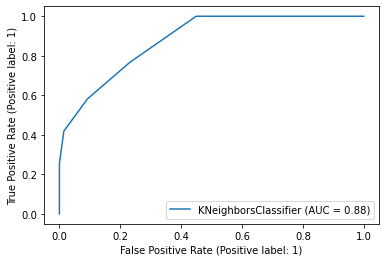

In [5]:
standard_scaler = StandardScaler()
X_scaler = standard_scaler.fit_transform(X)
X_knn_train, X_knn_test, y_knn_train, y_knn_test = train_test_split(X_scaler, y, test_size=0.25, random_state=0)
knn_model = KNeighborsClassifier()
knn_model.fit(X_knn_train, y_knn_train)
plot_roc_curve(knn_model, X_knn_test, y_knn_test)

1.2. То же самое и использованием sklearn.pipeline.Pipeline

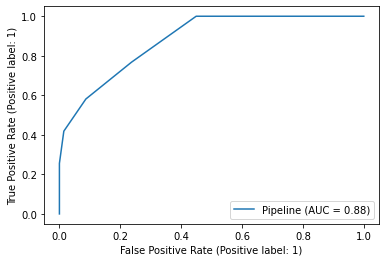

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)
pipe = make_pipeline(StandardScaler(), KNeighborsClassifier())
pipe.fit(X_train, y_train)  # apply scaling on training data
plot_roc_curve(pipe, X_test, y_test)

1.3. С помощью GridSearchCV произвести подбор гиперпараметра KNeighborsClassifier (n_neighbors) и выведите значение гиперпараметра и метрику для наилучшей модели

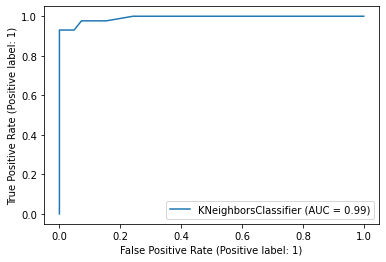

In [7]:
knn_params = {
    'n_neighbors': range(3, 33)
}
knn_gcv = GridSearchCV(KNeighborsClassifier(), knn_params, scoring="roc_auc")
knn_gcv.fit(X_knn_train, y_train)
plot_roc_curve(knn_gcv.best_estimator_, X_knn_test, y_test)

2.1. Продемонстрировать работу DecisionTreeClassifier, посчитать метрики качества на отложенной выборке

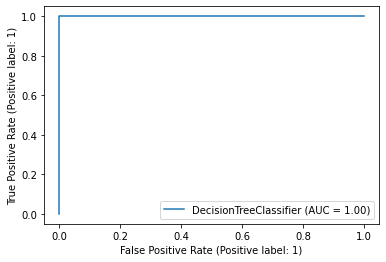

In [8]:
dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train)
plot_roc_curve(dtc, X_test, y_test)

2.2. С помощью GridSearchCV произвести подбор гиперпараметров для поиска наилучшего дерева (перебрать max_depth, max_features и может быть что-то ещё)

DecisionTreeClassifier(max_depth=4)


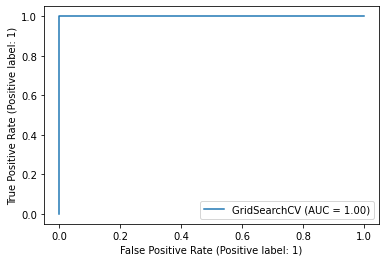

In [9]:
dtc_params = {
    'criterion': ('gini', 'entropy'),
    'max_depth': range(2, 30),
    'max_features': ('sqrt', 'log2', None)
}
dtc_gcv = GridSearchCV(DecisionTreeClassifier(), dtc_params)
dtc_gcv.fit(X_train, y_train)
print(dtc_gcv.best_estimator_)
plot_roc_curve(dtc_gcv, X_test, y_test)

2.3. Для полученного наилучшего дерева построить график feature_importances и дополнительно напечатать 3 наиболее важных признака, отсортировав их по убыванию важности

                  feature  importance
5  race/ethnicity_group A    0.397319
8  race/ethnicity_group E    0.283890
7  race/ethnicity_group D    0.205471


<AxesSubplot:xlabel='importance', ylabel='feature'>

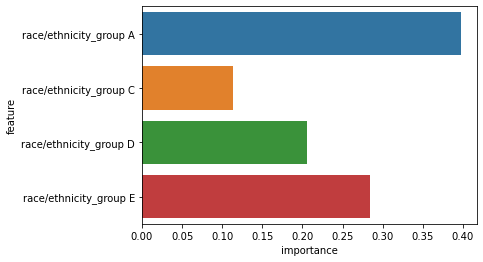

In [10]:
features_importance_df = pd.DataFrame(data={"feature": X_train.columns, 'importance': dtc_gcv.best_estimator_.feature_importances_})
print(features_importance_df.sort_values(by="importance", ascending=False).head(3))
# нарисуем столбчатую диаграмму только c теми признаками, у которых значимсоть больше 0
sns.barplot(data=features_importance_df[features_importance_df['importance'] > 0], y="feature", x="importance")

3.1. Продемонстрировать работу случайного леса RandomForestClassifier

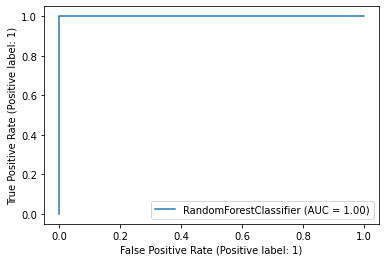

In [11]:
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
plot_roc_curve(rf, X_test, y_test)

3.2. С помощью GridSearchCV произвести подбор гиперпараметров для поиск наилучшего леса, посмотреть насколько улучшились метрики

RandomForestClassifier(n_estimators=25)


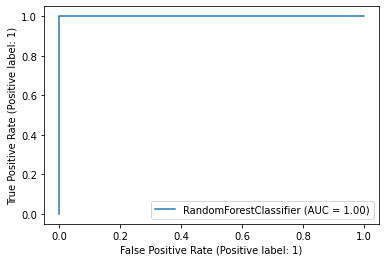

In [12]:
rf_params = {
    "n_estimators": range(2, 50),
    "criterion": ("gini", "entropy")
}
rf_gcv = GridSearchCV(RandomForestClassifier(), rf_params)
rf_gcv.fit(X_train, y_train)
print(rf_gcv.best_estimator_)
plot_roc_curve(rf_gcv.best_estimator_, X_test, y_test)

                  feature  importance
6  race/ethnicity_group C    0.292331
7  race/ethnicity_group D    0.173400
8  race/ethnicity_group E    0.152021


<AxesSubplot:xlabel='importance', ylabel='feature'>

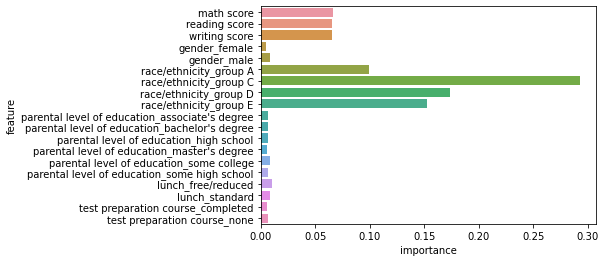

In [13]:
features_importance_df = pd.DataFrame(data={"feature": X_train.columns, 'importance': rf_gcv.best_estimator_.feature_importances_})
print(features_importance_df.sort_values(by="importance", ascending=False).head(3))
sns.barplot(data=features_importance_df[features_importance_df['importance'] > 0], y="feature", x="importance")

4. Сделать выводы. Какой классификатор и с камими гиперпараметрами дал в итоге наилучший результат для выбранного датасета на отложенной выборке.

1. Самой точной моделью оказался RandomForest
2. Для каждой модели важны разные признаки
3. GridSearchCV положительно влияет на точность модели